In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rajtilakls2510/car_price_predictor/master/quikr_car.csv')

In [2]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.shape

(892, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [6]:
df.kms_driven.dtypes

dtype('O')

In [7]:
df.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

# year has non numeric values
# year dtype is object, convert it to int
# price has ask for price and object dtypes convert it into int
# kms_driven has int and string, need to be separted, and converted into int
# fuel type cleaning
# null values

In [8]:
df_copy=df.copy()

In [9]:
df=df[df['year'].str.isnumeric()]

In [10]:
df['year']=df['year'].astype(int)

In [11]:
df.year

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [12]:
df = df[df['Price']!="Ask For Price"]          # removed rows having ask for price

In [13]:
df['Price']= df['Price'].str.replace(',','').astype(int)     # removing ',' and convert Price column in int

In [14]:
df['kms_driven']=df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')     # splitting int and srt, and replcing ','

In [15]:
df = df[df['kms_driven'].str.isnumeric()]

In [16]:
df['kms_driven']=df['kms_driven'].astype(int)

In [17]:
df[df['fuel_type'].isna()]                                  # need to remove the row 

,name,company,year,Price,kms_driven,fuel_type
132,Toyota Corolla,Toyota,2009,275000,26000,NaN


In [18]:
df[~df['fuel_type'].isna()]                       # using '~' to show value without null row

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [19]:
df = df[~df['fuel_type'].isna()]  

In [20]:
df['name']= df['name'].str.split(' ').str.slice(0,3).str.join(' ')

In [21]:
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [22]:
df.reset_index(drop=True)                             # index resetting

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [23]:
df = df[df['Price']<6e6].reset_index(drop=True)              #deleting the row showing outlier(8500000) price (df.describe())

In [24]:
df.to_csv('cleaned_car.csv')

<AxesSubplot:>

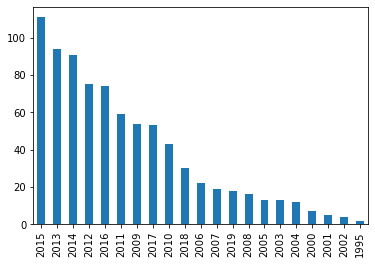

In [25]:
df['year'].value_counts().plot(kind = 'bar')

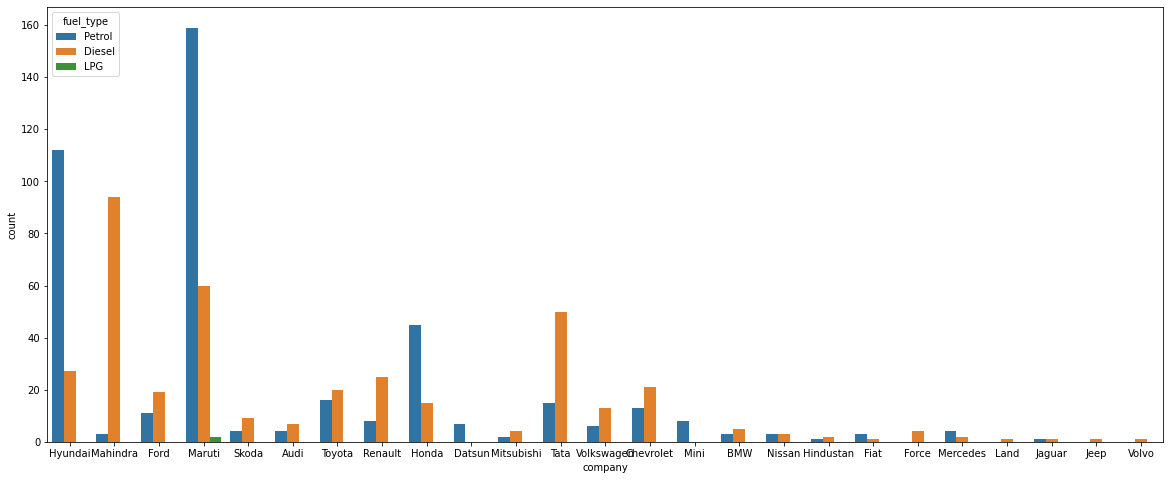

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,8))
sns.countplot(x='company', data = df, hue = 'fuel_type')
plt.show()

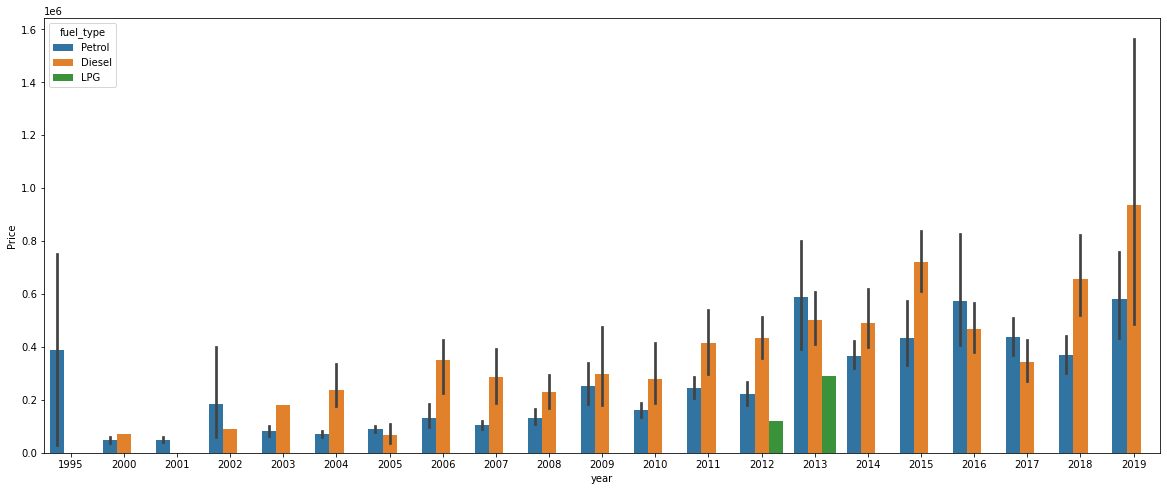

In [27]:
plt.figure(figsize= (20,8))
sns.barplot(x='year', y= 'Price', data = df, hue= 'fuel_type')
plt.show()

In [28]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first', dtype = np.int32)             # if sparse = Flase is used here then no  need of ',toarray()'
df_new = ohe.fit_transform(df[['company', 'fuel_type']]).toarray()          #'toarray' is used to see the result


In [29]:
df[['year', 'kms_driven']].values

array([[  2007,  45000],
       [  2006,     40],
       [  2014,  28000],
       ...,
       [  2009, 132000],
       [  2018,  27000],
       [  2013,  40000]])

In [30]:
import numpy as np 
np.hstack((df[['year', 'kms_driven']].values, df_new)).shape                # including x_train_new with x_train

(815, 28)

In [31]:
x_column = np.hstack((df[['year', 'kms_driven']].values, df_new))
x_column = pd.DataFrame(x_column)
x_column

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2007,45000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2006,40,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014,28000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2014,36000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012,41000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,2011,50000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
811,2009,30000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
812,2009,132000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
813,2018,27000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
count = df.name.value_counts()

In [33]:
# anything less than 10 value_counts to be converted into a different object
df['name'].nunique()
thresold = 10

In [34]:
repl = count[count<=thresold].index

In [35]:
x_name = pd.get_dummies(df['name'].replace(repl,'uncommon').values)
x_name

,Honda Amaze,Honda City,Honda City 1.5,Hyundai Elite i20,Hyundai Grand i10,Hyundai Santro Xing,Mahindra Scorpio S10,Maruti Suzuki Alto,Maruti Suzuki Dzire,Maruti Suzuki Ertiga,Maruti Suzuki Swift,Maruti Suzuki Wagon,Maruti Suzuki Zen,Tata Indigo eCS,uncommon
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
811,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
x = pd.concat([x_name,x_column], axis = 1)
x

,Honda Amaze,Honda City,Honda City 1.5,Hyundai Elite i20,Hyundai Grand i10,Hyundai Santro Xing,Mahindra Scorpio S10,Maruti Suzuki Alto,Maruti Suzuki Dzire,Maruti Suzuki Ertiga,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
811,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
y = df['Price']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 150)

In [39]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import r2_score
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.7691890400468636

In [41]:
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    print(r2_score(y_test,y_pred), i)

0.6106224429171814 0
0.6333219373406858 1
0.7213792809540205 2
0.6319816838174586 3
0.5759807520905317 4
0.5066783075193344 5
0.6586855878207083 6
0.6697019160392865 7
0.6883924674517461 8
0.6773052593064623 9


## to get max score

In [42]:
score =[]
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = i)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [43]:
print(score)
np.argmax(score)                                        # max is at 4th position

[0.673478447227347, 0.5200110051289046, 0.6542209169315594, 0.4614237229994895, 0.7743168164012514, 0.7436590702204979, 0.5529961793853534, 0.6323182418890138, 0.7712908060647559, 0.5250775886332413]


4

In [44]:
score[np.argmax(score)]

0.7743168164012514

In [45]:

score =[]
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = i)
    lr= LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    score.append(r2_score(y_test,y_pred))



In [49]:
max(score)

0.85424050164864

In [50]:
score.index(0.85424050164864)

686

In [46]:
np.argmax(score)

686

In [47]:
score[686]                                                          # this random state will be best

0.85424050164864

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state = 686)
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.85424050164864

In [50]:
import pickle
pickle.dump(lr,open('model.pkl', 'wb'))